In [ ]:
import nbimporter
import dataDownloader as dd

dd.downloadAndConvertToCSV()

In [21]:
import glob
import csv
import random

def getPreviousMatches(matches,x,teamVenue,predictionMatches):
    previousMatches = []
    for i in range(x-1,0,-1):
        if(len(previousMatches) == predictionMatches):
            break
        if(matches[x][teamVenue]==matches[i]['HomeTeam'] or matches[x][teamVenue]==matches[i]['AwayTeam']):
            previousMatches.append(matches[i])
    return previousMatches

def generateLearningSet(pastMatchesTaken, verbose = True):
    #Read files
    filesPaths = glob.glob("../data/*.csv")
    x_data = []
    y_data = []
    for dataFile in filesPaths: 
        if(verbose == True):
            print(f"Reading file {dataFile}")
        with open(dataFile) as csvfile:
            reader = csv.DictReader(csvfile)
            #print(f"reading file {dataFile} with {sum(1 for line in reader)} entries")
            matches = []
            try:
                for row in reader:
                    matches.append(row)
                for x in range(len(matches)):
                    homePreviousMatches = getPreviousMatches(matches, x, 'HomeTeam', pastMatchesTaken)
                    awayPreviousMatches = getPreviousMatches(matches, x,'AwayTeam', pastMatchesTaken)
                    temp = []
                    if len(homePreviousMatches) == pastMatchesTaken and len(awayPreviousMatches) == pastMatchesTaken:
                        #print(f"{x}: {matches[x]['HomeTeam']} vs {matches[x]['AwayTeam']}")

                        for hm in homePreviousMatches:
                            if matches[x]['HomeTeam'] == hm['HomeTeam']:
                                temp.append(int(float(hm['FTHG']))-int(float(hm['FTAG'])))
                                temp.append(int(float(hm['HS'])))
                                temp.append(int(float(hm['AS'])))
                                temp.append(int(float(hm['HST'])))
                                temp.append(int(float(hm['AST'])))
                                temp.append(int(float(hm['HC'])))
                                temp.append(int(float(hm['AC'])))
                            else:
                                temp.append(int(float(hm['FTAG']))-int(float(hm['FTHG'])))
                                temp.append(int(float(hm['AS'])))
                                temp.append(int(float(hm['HS'])))
                                temp.append(int(float(hm['AST'])))
                                temp.append(int(float(hm['HST'])))
                                temp.append(int(float(hm['AC'])))
                                temp.append(int(float(hm['HC'])))
                            #matchLearningData.append(temp)

                        for am in homePreviousMatches:
                            if matches[x]['AwayTeam'] == am['HomeTeam']:
                                temp.append(int(float(am['FTHG']))-int(float(am['FTAG'])))
                                temp.append(int(float(am['HS'])))
                                temp.append(int(float(am['AS'])))
                                temp.append(int(float(am['HST'])))
                                temp.append(int(float(am['AST'])))
                                temp.append(int(float(am['HC'])))
                                temp.append(int(float(am['AC'])))
                            else:
                                temp.append(int(float(am['FTAG']))-int(float(am['FTHG'])))
                                temp.append(int(float(am['AS'])))
                                temp.append(int(float(am['HS'])))
                                temp.append(int(float(am['AST'])))
                                temp.append(int(float(am['HST'])))
                                temp.append(int(float(am['AC'])))
                                temp.append(int(float(am['HC'])))
                            #matchLearningData.append(temp)
                            

                        x_data.append(temp)
                        if(int(float(matches[x]['FTHG'])) > int(float(matches[x]['FTAG']))):
                            y_data.append(1)
                        elif (int(float(matches[x]['FTAG'])) > int(float(matches[x]['FTHG']))):
                            y_data.append(-1)
                        else:
                            y_data.append(0)
            except Exception as e:
                if(verbose == True):
                    print(f"Problem with league {dataFile} : {e}")
                pass
                    
    return x_data, y_data

def createTrainAndTestSets(x_data, y_data, trainToOverallRatio):
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    for i in range(len(x_data)):
        if(random.random() < trainToOverallRatio):
            x_train.append(x_data[i])
            y_train.append(y_data[i])
        else:
            x_test.append(x_data[i])
            y_test.append(y_data[i])
    return x_train, y_train, x_test, y_test

In [22]:
x_data, y_data = generateLearningSet(7)
x_train, x_test, y_train, y_test = createTrainAndTestSets(x_data, y_data, 0.7)

print(f"overall matches count: {len(x_data)}")
print(f"train matches count: {len(x_train)}   {len(x_train)/len(x_data)}% of overall")
print(f"test matches count: {len(x_test)}")
print(x_train[0])
print(y_train[0])

Reading file ../data\B1-1314.csv
Problem with league ../data\B1-1314.csv : 'AS'
Reading file ../data\B1-1415.csv
Problem with league ../data\B1-1415.csv : 'AS'
Reading file ../data\B1-1516.csv
Problem with league ../data\B1-1516.csv : 'AS'
Reading file ../data\B1-1617.csv
Problem with league ../data\B1-1617.csv : 'HS'
Reading file ../data\B1-1718.csv
Reading file ../data\B1-1819.csv
Reading file ../data\B1-1920.csv
Reading file ../data\D1-1314.csv
Reading file ../data\D1-1415.csv
Reading file ../data\D1-1516.csv
Reading file ../data\D1-1617.csv
Reading file ../data\D1-1718.csv
Reading file ../data\D1-1819.csv
Reading file ../data\D1-1920.csv
Reading file ../data\D2-1314.csv
Problem with league ../data\D2-1314.csv : 'AS'
Reading file ../data\D2-1415.csv
Problem with league ../data\D2-1415.csv : 'AS'
Reading file ../data\D2-1516.csv
Problem with league ../data\D2-1516.csv : 'AS'
Reading file ../data\D2-1617.csv
Problem with league ../data\D2-1617.csv : 'AS'
Reading file ../data\D2-1718.c

In [ ]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd

df = pd.read_csv ("../filtrage/outputfile.csv")
print(df.shape)

#Nous disposons de 279 observations et 105 variables
rom sklearn.model_selection import train_test_split
all_inputs = df[['AS','HS','AST','HST','HC','AC']].values
all_labels = (df['FTHG'] - df['FTAG']).values
(training_inputs,testing_inputs,training_classes,testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()
# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)
# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)
#Nous avons 7 variables non numériques de type object
#subdiviser les données en échantillons d'apprentissage et de test
feature_cols = ['FTAG','AS','HS','AST','HST','HC','AC']
y= df['FTHG'] - df['FTAG'] #la différence des buts entre les deux équipes si c'est sup à 0 alors l'équipe a gagné
#df.insert(106,"nb_buts",y)
feature_target=df.nb_buts
#train, y_test = train_test_split(X,df.FTAG, test_size=0.3, random_state=1) # # 70% training and 30% test
dfTrain, dfTest = train_test_split(df,test_size=,random_state=1,stratify=df.nb_buts)
#accuracé de 22 pourcent, ce n'est pas bien


In [2]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

def fit(x_train, y_train):
    clf.fit(x_train,y_train)

def predict(x_test):
    return clf.predict(x_test)

def score(X,y):
    return clf.score(X,y)

In [18]:
fit(x_train, y_train)
predictions = predict(x_test)
print(score(x_test,y_test))
# print(predictions)
# print(y_test)

0.4193787897537434


In [9]:
#Etape 3 - Hyperparametres
#3.1 - Nombre de matches pris en compte
# Nous allons analyser l'impact du nombre de matches ulterieurs sur la precision de notre modele
pastMatchesCountRange = range(1,10)
results = []

for x in pastMatchesCountRange:
    results.append([]) # On initialise les entrées pour chaque nombre des matches 

iterationsCount = 10

# On fais le calcul 5 fois pour ensuite prendre la moyenne dans la cellule suivante
for i in range(iterationsCount):
    print(f"Pass {i+1}/{iterationsCount}")
    for x in pastMatchesCountRange:
        x_data, y_data = generateLearningSet(x, False)
        x_train, y_train, x_test, y_test = createTrainAndTestSets(x_data, y_data, 0.7)

        fit(x_train, y_train)
        predictions = predict(x_test)

        results[x-1].append(score(x_test,y_test))

print(results)

# print(results)

Pass 1/10
Pass 2/10
Pass 3/10
Pass 4/10
Pass 5/10
Pass 6/10
Pass 7/10
Pass 8/10
Pass 9/10
Pass 10/10
[[0.4227469879518072, 0.41952481318260204, 0.4300498635807696, 0.42525649630837087, 0.42727185674614576, 0.42409638554216866, 0.42411093293085556, 0.4285305889079474, 0.42983121562677795, 0.4261105196941837], [0.4264199232207894, 0.42503466032877796, 0.43036711891460494, 0.42684840164738186, 0.4276686758701147, 0.4239635895913723, 0.4226884226884227, 0.4329581358609795, 0.4236510879110157, 0.422766598619617], [0.42164781906300486, 0.42328890670407854, 0.42600806451612905, 0.4217951339194439, 0.4298519488367409, 0.41915067374438547, 0.43166717775733415, 0.42645128722867237, 0.4250125565042692, 0.4307692307692308], [0.43154008438818564, 0.42596810933940776, 0.41978637353520687, 0.4276315789473684, 0.4295224006762468, 0.42384591227886526, 0.42308499475341027, 0.41621167576648466, 0.41499947627526973, 0.4203841073061681], [0.42080962095994845, 0.4299175500588928, 0.42694960212201594, 0.4176

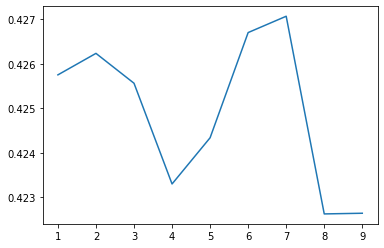

[0.42575296604716273, 0.4262366614653076, 0.42556427990432893, 0.42329747132666135, 0.42433740064085185, 0.4267047902274033, 0.42707220728407763, 0.42262342952157894, 0.42263851691201965]


In [10]:
import matplotlib.pyplot as plt

averages =[]
for x in range(len(results)):
    sum = 0
    for c in range(len(results[x])):
        sum += results[x][c]
    averages.append(sum/len(results[x]))

plt.plot(pastMatchesCountRange,averages)
plt.show()
print(averages)

In [20]:
# Custom predictions method
print(clf.classes_)

predictProba = clf.predict_proba(x_test)

customPredictions = []
customResults = []
treshold = 0.6
for x in range(len(x_test)):
    if predictProba[x][0] > treshold:
        customPredictions.append(clf.classes_[0])
    elif predictProba[x][1] > treshold:
        customPredictions.append(clf.classes_[1])
    elif predictProba[x][2] > treshold:
        customPredictions.append(clf.classes_[2])
    else:
        continue
    customResults.append(y_test[x])

correctPredictions = 0
for i in range(len(customPredictions)):
    if customPredictions[i] == customResults[i]:
        correctPredictions += 1

print(f"custom predictions: {correctPredictions/len(customPredictions)}") 
print(f"correct : {correctPredictions} negative : {len(customPredictions)-correctPredictions} thrown-away: {len(x_test)-len(customPredictions)} total : {len(x_test)}")

[-1  0  1]
custom predictions: 0.5030008573878251
correct : 1760 negative : 1739 thrown-away: 4582 total : 8081


In [34]:
print(clf.predict_proba(x_test))

[[0.69333899 0.27792782 0.02873319]
 [0.56230107 0.30841345 0.12928548]
 [0.68853452 0.24650518 0.06496031]
 ...
 [0.30087708 0.4708303  0.22829262]
 [0.75481642 0.22897977 0.01620381]
 [0.05435381 0.1890429  0.7566033 ]]
